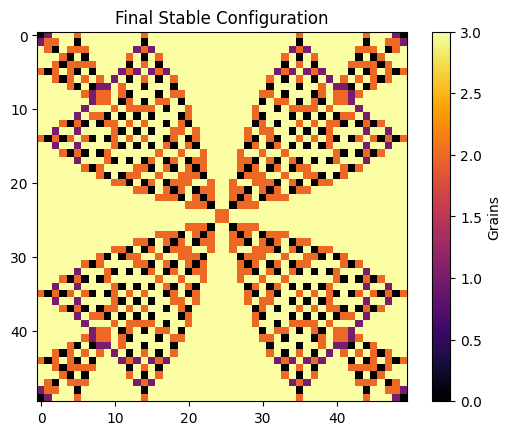

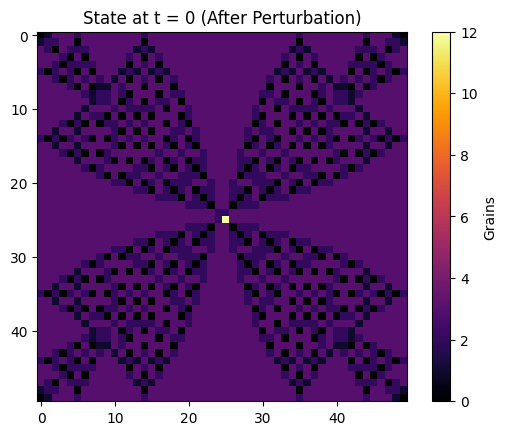

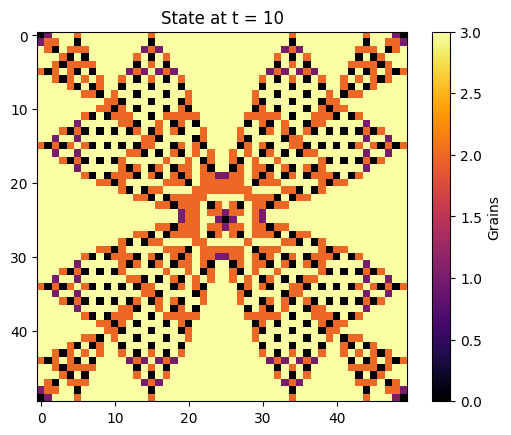

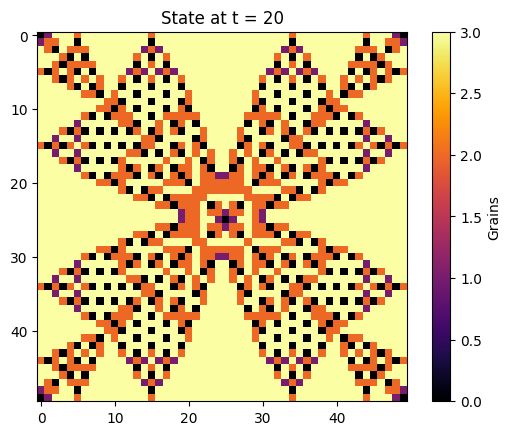

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_grid(L, threshold):
    """Initialize an LxL grid with all sites at the threshold."""
    return np.full((L, L), threshold)

def topple(grid, threshold):
    """Run the sandpile model until stabilization."""
    L = grid.shape[0]
    stabilized = False
    
    while not stabilized:
        stabilized = True
        unstable_sites = np.argwhere(grid >= threshold)

        for x, y in unstable_sites:
            grid[x, y] -= 4  # Topple
            if x > 0: grid[x - 1, y] += 1  # Left neighbor
            if x < L - 1: grid[x + 1, y] += 1  # Right neighbor
            if y > 0: grid[x, y - 1] += 1  # Top neighbor
            if y < L - 1: grid[x, y + 1] += 1  # Bottom neighbor
            
            stabilized = False  # System still evolving

    return grid

def perturb(grid, center, amount):
    """Apply a perturbation at the center."""
    x, y = center
    grid[x, y] += amount  # Add grains to the center
    return grid

def simulate_perturbation(L, threshold, perturb_amount, time_steps):
    """Simulate the sandpile with perturbation and capture states at different time steps."""
    grid = initialize_grid(L, threshold)
    stabilized_grid = topple(grid, threshold)  # Stabilize initial condition
    
    center = (L // 2, L // 2)
    perturbed_grid = stabilized_grid.copy()
    perturbed_grid = perturb(perturbed_grid, center, perturb_amount)  # Apply perturbation

    snapshots = {0: perturbed_grid.copy()}  # Save initial perturbed state

    for t in range(1, max(time_steps) + 1):
        perturbed_grid = topple(perturbed_grid, threshold)
        if t in time_steps:
            snapshots[t] = perturbed_grid.copy()

    return stabilized_grid, snapshots

def plot_grid(grid, title):
    """Plot a grid using a heatmap."""
    plt.imshow(grid, cmap="inferno", origin="upper")
    plt.colorbar(label="Grains")
    plt.title(title)
    plt.show()

# Parameters
L = 50  # Lattice size
threshold = 4  # Avalanche threshold
perturb_amount = 10  # Number of grains added
time_steps = [10, 20]  # Timesteps to capture

# Run simulation
final_stable, snapshots = simulate_perturbation(L, threshold, perturb_amount, time_steps)

# Plot results
plot_grid(final_stable, "Final Stable Configuration")
plot_grid(snapshots[0], "State at t = 0 (After Perturbation)")
plot_grid(snapshots[10], "State at t = 10")
plot_grid(snapshots[20], "State at t = 20")
